**Hypothesis Testing and Stats (some very basic basics)**

Today we're going to do a very brief lesson on the fundamental design of an "experiment" and how to test results: hypothesis testing and some basic stats (p values, t tests). We're going to use, as our example, the question and basic methods of the essay we read last week by Matthew Wilkens, on American literature's hypothesized insularity (here: https://culturalanalytics.org/article/25273-too-isolated-too-insular-american-literature-and-the-world)

Let's start, then by making up a basic dataset that represnets the kind of data that this article might have been working with, after running its NER algorithm on a small scale. This data represents 5 American novels and 5 nonAmerican novels (European) and for each it gives the number of mentions of locations in the home country vs number of mentions of another county.



In [2]:
import pandas as pd

# Creating a fake dataset
data = {
    'novel': ['A1', 'A2', 'A3', 'A4', 'A5', 'E1', 'E2', 'E3', 'E4', 'E5'],
    'category': ['American'] * 5 + ['European'] * 5,
    'home_mentions': [30, 25, 28, 40, 35, 10, 15, 12, 18, 20],
    'non_home_mentions': [10, 12, 15, 20, 18, 30, 28, 35, 40, 38]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Compute the proportion of home-country mentions
df['home_country_prop'] = df['home_mentions'] / (df['home_mentions'] + df['non_home_mentions'])

# Display the dataset
print(df)

  novel  category  home_mentions  non_home_mentions  home_country_prop
0    A1  American             30                 10           0.750000
1    A2  American             25                 12           0.675676
2    A3  American             28                 15           0.651163
3    A4  American             40                 20           0.666667
4    A5  American             35                 18           0.660377
5    E1  European             10                 30           0.250000
6    E2  European             15                 28           0.348837
7    E3  European             12                 35           0.255319
8    E4  European             18                 40           0.310345
9    E5  European             20                 38           0.344828


**Hypothesis testing**

So, let's discuss this study - Wilkens- in terms of testing a hypothesis. What would the hypothesis be? What does that make the "null hypothesis"?

Hypothesis Testing: A method to determine if there is a significant difference between groups based on sample data.

Null Hypothesis (H₀): American and European novels have similar proportions of home-country mentions relative to non-home-country mentions.

Alternative Hypothesis (H₁): American novels mention their home country more frequently relative to non-home-country mentions than European novels do.

To test this hypothesis, we will compute summary statistics and conduct a t-test.





**Descriptive statistics**

Let's start with some basic descriptive statistics, for each of the types of novels - american and non - and for the proportion of times they mentiion the home country. like mean, median, mode etc. Remember these?

In [3]:
# Grouping by category to compute descriptive statistics
summary = df.groupby('category')['home_country_prop'].describe()
print(summary)

          count      mean       std       min       25%       50%       75%  \
category                                                                      
American    5.0  0.680776  0.039718  0.651163  0.660377  0.666667  0.675676   
European    5.0  0.301866  0.047383  0.250000  0.255319  0.310345  0.344828   

               max  
category            
American  0.750000  
European  0.348837  


This .describe function gets you al the stats, but there are also individual commands to get the other numbers. Here we'll do it with the df via pandas, like:

In [4]:
# Compute mean, median, mode, and standard deviation
mean_value = df['home_country_prop'].mean()
median_value = df['home_country_prop'].median()
mode_value = df['home_country_prop'].mode()[0]  # Mode may return multiple values, take the first
std_dev = df['home_country_prop'].std()

# Print results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Standard Deviation: {std_dev}")

Mean: 0.49132112635621833
Median: 0.5
Mode: 0.25
Standard Deviation: 0.20391284884781016


OK, but let's say, then, we get our "results"; and we notice, for example, that there's a difference in the average proportional count between the two types of novels. The American novels, on average, address the home countr .68 proportion of the times, ans the European ones .30. But how can we tell that this differnce is "enough" to really represent a meaninful distinction? This is where p values and t-tests come in....

(mini lecture)

Now, let's perform a t-test to see if the difference in means between American and European novels is statistically significant.

Coding quiz - can you try to work out what each line ot the code is doing, even without prior knowledge? What might ttest_ind be? etc.

In [5]:
from scipy.stats import ttest_ind

# Separating the two groups
american_novels = df[df['category'] == 'American']['home_country_prop']
european_novels = df[df['category'] == 'European']['home_country_prop']

# Performing t-test
t_stat, p_value = ttest_ind(american_novels, european_novels)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 13.703725913131201, P-value: 7.749285926232153e-07


If the p-value < 0.05, we reject the null hypothesis and conclude that American novels do focus on home-country places more than European novels.

Other Hypothesis Tests (Brief Overview):

Chi-Square Test: Used for categorical data, like whether high/low home-country focus is associated with novel origin.

ANOVA: Used when comparing more than two groups (e.g., US vs. UK vs. France).

Z-Test: Similar to a t-test but used when sample sizes are large (>30).

For more on basic stats and these tests, see: https://leanpub.com/os

**Linear Regression**

Now, let’s talk about linear regression using an additional, imagined dataset. Let's say we have data on how much of their life the author of each author spen in their home country.

New Data: Author’s Time Spent in Home Country

We might hypothesize that the more time an author spent in their home country, the more times they mention it, proportionally, in their novel.

I.e., we speculate there's a relationship between the independent variable,time spent in country, and dependent variable, proportion of mentions in home country. We might first measure a correlation coefficient, to see if there's a correlation, but then we might run a linear regression:

In [6]:
# Adding fake data for percentage of life spent in home country
import numpy as np
np.random.seed(42)
df['percent_life_home'] = np.random.randint(40, 100, size=len(df))

# Display updated dataset
print(df)

  novel  category  home_mentions  non_home_mentions  home_country_prop  \
0    A1  American             30                 10           0.750000   
1    A2  American             25                 12           0.675676   
2    A3  American             28                 15           0.651163   
3    A4  American             40                 20           0.666667   
4    A5  American             35                 18           0.660377   
5    E1  European             10                 30           0.250000   
6    E2  European             15                 28           0.348837   
7    E3  European             12                 35           0.255319   
8    E4  European             18                 40           0.310345   
9    E5  European             20                 38           0.344828   

   percent_life_home  
0                 78  
1                 91  
2                 68  
3                 54  
4                 82  
5                 47  
6                 60  
7

We’ll predict home_country_prop using percent_life_home.

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:      home_country_prop   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                 -0.068
Method:                 Least Squares   F-statistic:                    0.4238
Date:                Wed, 05 Mar 2025   Prob (F-statistic):              0.533
Time:                        03:00:48   Log-Likelihood:                 2.4962
No. Observations:                  10   AIC:                           -0.9923
Df Residuals:                       8   BIC:                           -0.3871
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2940      0.31

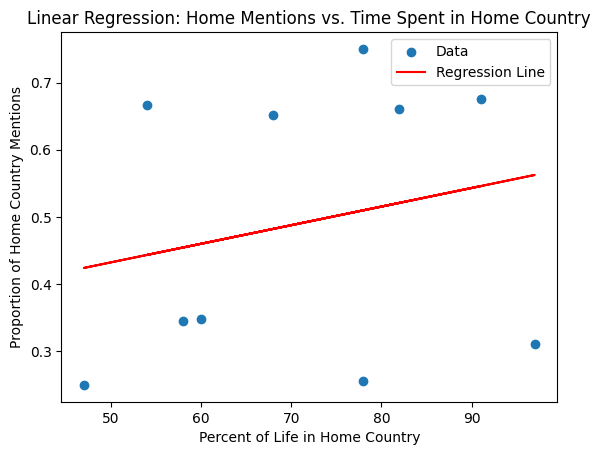

In [10]:
# Adding fake data for percentage of life spent in home country
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(42)
df['percent_life_home'] = np.random.randint(40, 100, size=len(df))

# Define X (independent) and y (dependent)
X = df[['percent_life_home']]
y = df['home_country_prop']
X = sm.add_constant(X)  # Add intercept

# Fit linear regression
model = sm.OLS(y, X).fit()

# Print summary (includes p-value for significance)
print(model.summary())

# Create scatter plot with regression line
plt.scatter(df['percent_life_home'], df['home_country_prop'], label='Data')
plt.plot(df['percent_life_home'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Percent of Life in Home Country')
plt.ylabel('Proportion of Home Country Mentions')
plt.title('Linear Regression: Home Mentions vs. Time Spent in Home Country')
plt.legend()
plt.show()

The coefficient for percent_life_home tells us how much home-country mentions increase per additional year spent at home.

The p-value tells us if this relationship is statistically significant.

**Logistic Regression**

To be covered next time; when the "dependent" variable spot, or output, is binary, like two categories
